# Exploring different Contouring shading options in Magics

This notebook will help you discover lots of posibilities for designing shading on your maps in Magics.

At ECMWF  

From your workstation:
--------------

load python3  
module swap (or load) Magics/new   
jupyter notebook  

load this notebook



**mcont** controls shading and lines on our maps. Here you can set things like colours, thickness, style, frequency of your lines and shading.  
List of all **mcont** parameters you can find [here](https://confluence.ecmwf.int/display/MAGP/Contouring "Contouring parameters")


### Import Magics and define non Contour paramters

For start let's import Magics and define some **none contour** parameters. We will try not to change these much in the rest of the notebook.

In [2]:
import Magics.macro as magics

projection = magics.mmap(
    subpage_map_library_area = "on",
    subpage_map_area_name = "europe"
)

coast = magics.mcoast()

black_coast = magics.mcoast(
    map_coastline_colour            = "grey",
    map_coastline_resolution        = "medium",
    map_coastline_thickness         = 2,
    map_coastline_land_shade        = "on",
    map_coastline_land_shade_colour = "RGB(0.25,0.25,0.25)",
    map_coastline_sea_shade         = "on",
    map_coastline_sea_shade_colour  = "black",
    map_grid_line_style             = "dash",
    map_grid_colour                 = "grey"
)


legend = magics.mlegend(legend_display_type   = 'continuous')

# Different meteorological parameter we will plot in this notebook
temperature   = magics.mgrib(grib_input_file_name = "t850.grib")
geopotential  = magics.mgrib(grib_input_file_name = "z500.grib")
precipitation = magics.mgrib(grib_input_file_name = "total_precipitation.grib")
sat_ir        = magics.mgrib(grib_input_file_name = "ssd.grib",
                             grib_automatic_scaling = "off")
ptype         = magics.mgrib(grib_input_file_name = "ptype.grib")

As with everything in Magics, default is something you can start with. Let's turn contours off, and turn shading on.

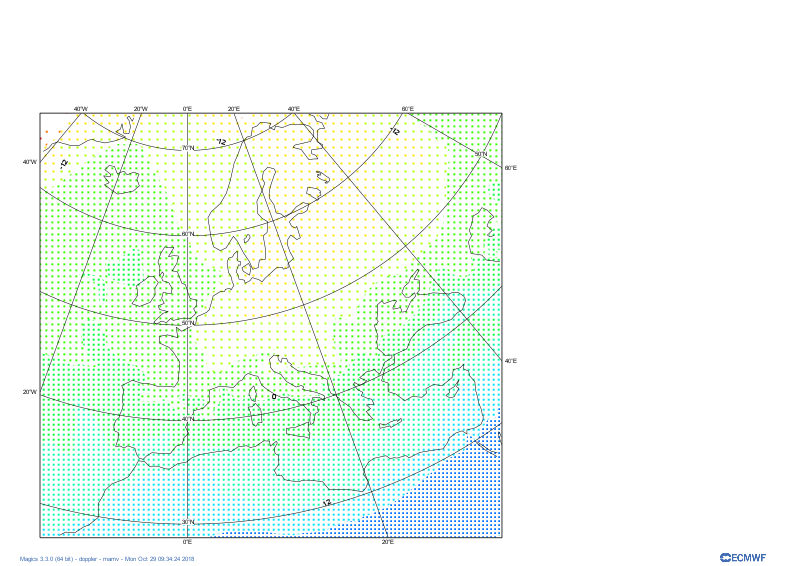

In [3]:
t_cont = magics.mcont(
    contour       = "off",
    contour_shade = "on")

magics.plot(projection, temperature, t_cont, coast)

### Simple shading  <a id='simple_shading'></a>

Coloured dots for all parameters is not the most exciting or useful style for inspecting our data, so let's see what we can change here.

We will set the **contour_shade_method** to **"area_fill"**, to fill the area instead of using dots. Other methods are dot and hatch.



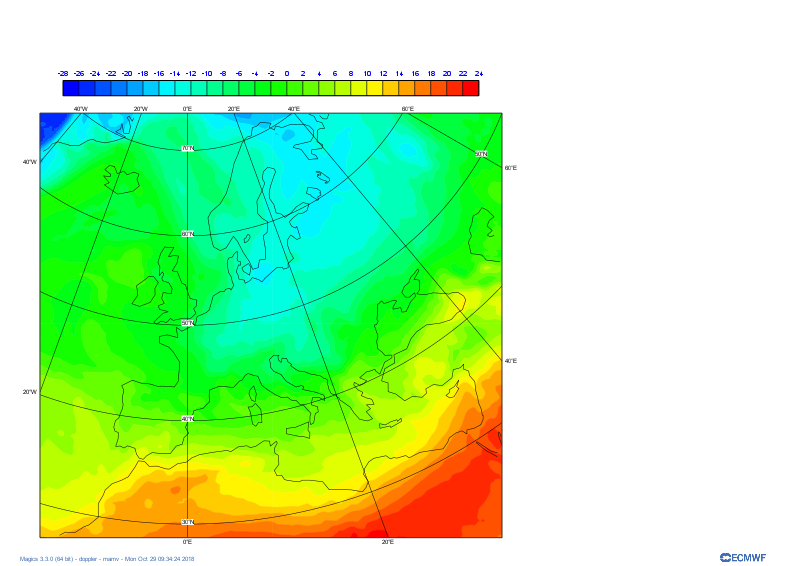

In [4]:
t_cont = magics.mcont( 
    contour                        = "off",
    contour_level_selection_type   = "interval",
    contour_interval               = 2.00,
    contour_shade                  = "on",
    contour_shade_method           = "area_fill",
    contour_shade_min_level        = -28,
    contour_shade_max_level        = 24,
    contour_shade_colour_method    = "calculate",
    contour_shade_colour_direction = "clockwise",
    contour_highlight              = "off",
    contour_label                  = "off",
    contour_shade_max_level_colour = "red",
    contour_shade_min_level_colour = "blue",
    legend = "on"
)
       
magics.plot(projection, temperature, t_cont, coast, legend)

### Gradients

In previous example we used **calculate** method to choose colours. The limitation of this method is that there can only be 2 points between which we choose colours, and one method of cacluating colours (RGB).  

Magics has more powerful way of calculating colours for you called the **gradients**. With gradients you can set many waypoint colours and Magics will calculate shades in between.  
With parameter **contour_gradients_waypoint_method** we control if these waypoint colours will be included in our shading, and in which position.  

|**gradients parameter** | description |
|-----------------|
|contour_level_list | list of levels |   
| contour_gradients_step_list | number of steps between levels in contour_level_list |
|level_list | uses the given list of levels |
|contour_gradients_colour_list | list of colours at main levels |
|contour_gradients_waypoint_method| ignore / left / right / both |
|contour_gradients_technique | RGB / HCL / HSL |

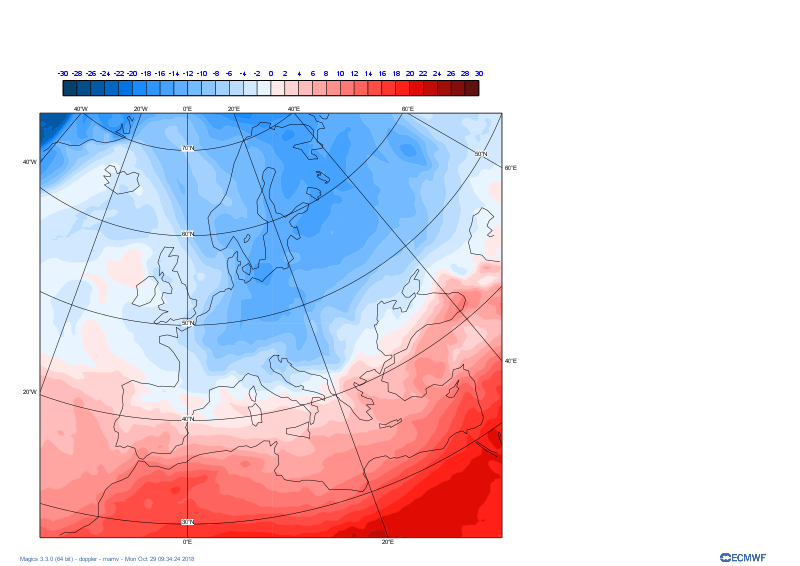

In [5]:
t_cont = magics.mcont(
    legend                            = "on",
    contour                           = "off",
    contour_level_selection_type      = "level_list",
    contour_level_list                = [-30.,-20.,0.,20.,30.],
    contour_gradients_step_list       = [5,10,10,5],
    contour_label                     = "off",
    contour_shade                     = "on",
    contour_shade_colour_method       = "gradients",
    contour_gradients_technique       = "rgb",
    contour_shade_method              = "area_fill",
    contour_gradients_colour_list     = ["RGB(0.01961,0.251,0.4157)","greenish_blue","white",
                                         "orangish_red","RGB(0.3756,0.06648,0.05582)"],
    contour_gradients_waypoint_method = "ignore")

magics.plot(projection, temperature, t_cont, coast, legend)

Instead of letting Magics calculate colours for us, we can always supply the full list of colours.  

Magics accepts several ways of defining colours. Colors may be specified as an RGB triplet or in hexadecimal format. There are also built in nambed colours. The full list of available named colours can be found in [Magics documentation](https://confluence.ecmwf.int/display/MAGP/Setting+colours "Setting colours").

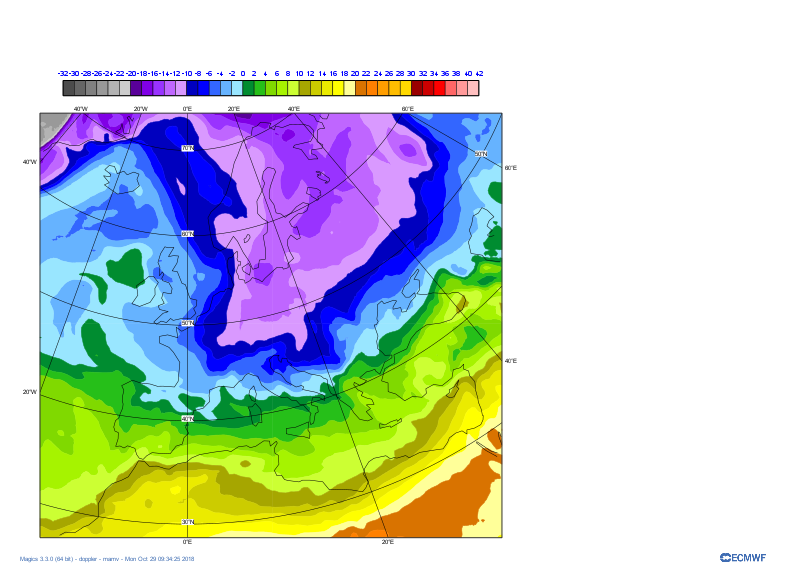

In [6]:
t_cont = magics.mcont(
    contour_level_selection_type = "interval",
    contour_interval             = 2.00,
    contour_shade_method         = "area_fill",
    contour_shade                = "on",
    contour_shade_max_level      = 42.00,
    contour_shade_min_level      = -32.00,
    contour_label                = "off",
    legend                       = "on",
    contour                      = "off",
    contour_shade_colour_method  = "list",
    contour_shade_colour_list    = ["rgb(0.3,0.3,0.3)", "rgb(0.4,0.4,0.4)", "rgb(0.5,0.5,0.5)", 
                                    "rgb(0.6,0.6,0.6)", "rgb(0.7,0.7,0.7)","rgb(0.8,0.8,0.8)", 
                                    "rgb(0.35,0,0.6)", "rgb(0.5,0,0.9)", "rgb(0.6,0.2,1)", 
                                    "rgb(0.75,0.4,1)", "rgb(0.85,0.6,1)", "rgb(0,0,0.75)", 
                                    "rgb(0,0,1)", "rgb(0.2,0.4,1)", "rgb(0.4,0.7,1)", 
                                    "rgb(0.6,0.9,1)", "rgb(0,0.55,0.19)", "rgb(0.15,0.75,0.1)", 
                                    "rgb(0.5,0.85,0)", "rgb(0.65,0.95,0)", "rgb(0.8,1,0.2)", 
                                    "rgb(0.65,0.65,0)", "rgb(0.8,0.8,0)", "rgb(0.92,0.92,0)", 
                                    "rgb(1,1,0)", "rgb(1,1,0.6)", "rgb(0.85,0.45,0)", 
                                    "rgb(1,0.5,0)", "rgb(1,0.62,0)", "rgb(1,0.74,0)", 
                                    "rgb(1,0.85,0)", "rgb(0.6,0,0)", "rgb(0.8,0,0)", "rgb(1,0,0)", 
                                    "rgb(1,0.4,0.4)", "rgb(1,0.6,0.6)", "rgb(1,0.75,0.75)"])

magics.plot(projection, temperature, t_cont, coast, legend)

### Supplying the list of levels and colours

If we don't want to leave anything to Magics, we can suply list of levels and colours to be used between those levels. 

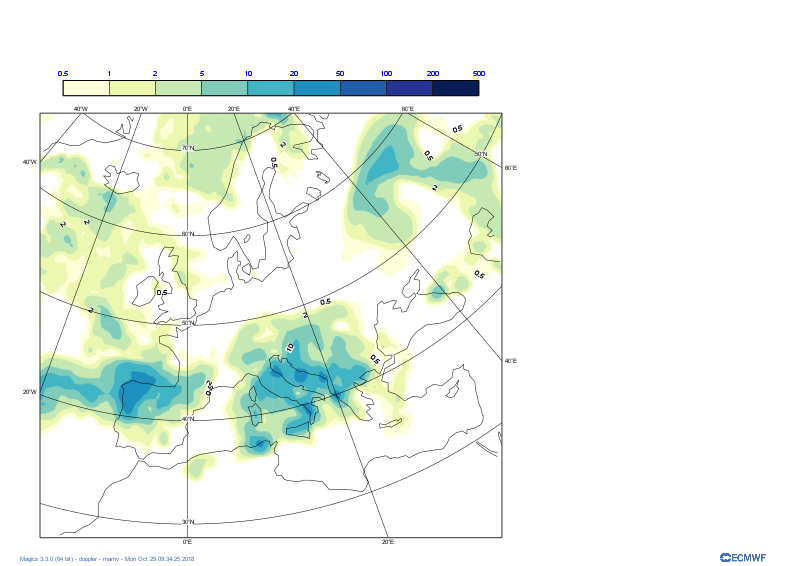

In [7]:
tp_cont = magics.mcont(
    contour_level_selection_type   = "level_list",
    contour_level_list             = [0.5, 1, 2, 5, 10, 20, 50, 100, 200, 500],
    contour_shade                  = "on",
    contour_shade_method           = "area_fill",
    contour_shade_colour_method    = "list",
    contour_shade_colour_list      = ['#ffffd9','#edf8b1','#c7e9b4',
                                      '#7fcdbb','#41b6c4','#1d91c0',
                                      '#225ea8','#253494','#081d58'],
    contour                        = "off",
    legend                         = "on"
)

magics.plot(projection, precipitation, tp_cont, coast, legend)

### Grid shading

Sometimes we need a plot where every grid point is coloured and no interpolation is done. For this purpose Magics has **Grid shading method**.  

In this example we are plotting precipitation type, where type is given by numbers. Obviously, the legend is not correct, and you can see how to set legend for this case in **Legends notebook**

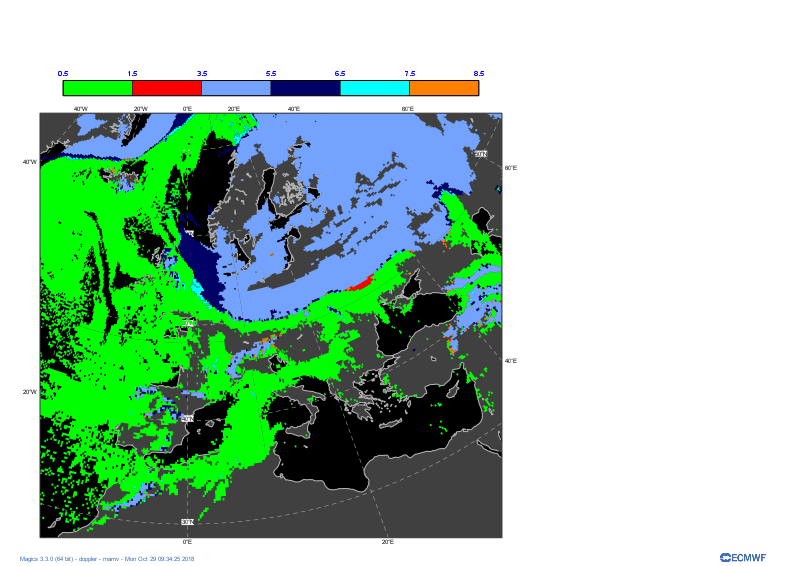

In [8]:
grid_shading = magics.mcont(
    contour_shade_technique      = "grid_shading",
    contour_shade_colour_method  = "list",
    contour                      = "off",
    contour_level_selection_type = "level_list",
    contour_level_list           = [0.5,1.5,3.5,5.5,6.5,7.5,8.5],
    contour_shade                = "on",
    contour_shade_min_level      = 0.5,
    contour_shade_max_level      = 8.5,
    contour_shade_colour_list    = ["green","red","sky","navy","cyan","orange"],
    legend                       = "on"
)  

magics.plot(projection, black_coast, ptype, grid_shading, legend)

### Marker shading

Since we are already plotting precipitation type, we might want appropriate symbol for each precipitation type. Magics has built in collection of meteorological symbols and all you have to do is give it WMO code. Full list of WMO codes and descriptions for present/past weather, sky cover, pressure tendency and clouds you can find [on Wikipedia](https://commons.wikimedia.org/wiki/Weather_map "Weather map symbols").

|**marker type** | names |
|-----------------|
| present weather | ww_00,.., ww_99  |  
| past weather | W_0,.., W_9 |
| low clouds | CL_1,.., CL_9 |
| medium clouds | CM_1,.., CM_9 |
| high clouds | CH_1,.., CH_9 |
| type of cloud| C_0,.., C_9|
| total amount all clouds | N_0,..,N9 |
| atmospheric pressure tendency | a_0,..,a_9 |

Let's also zoom map a little bit so we can see markers better.

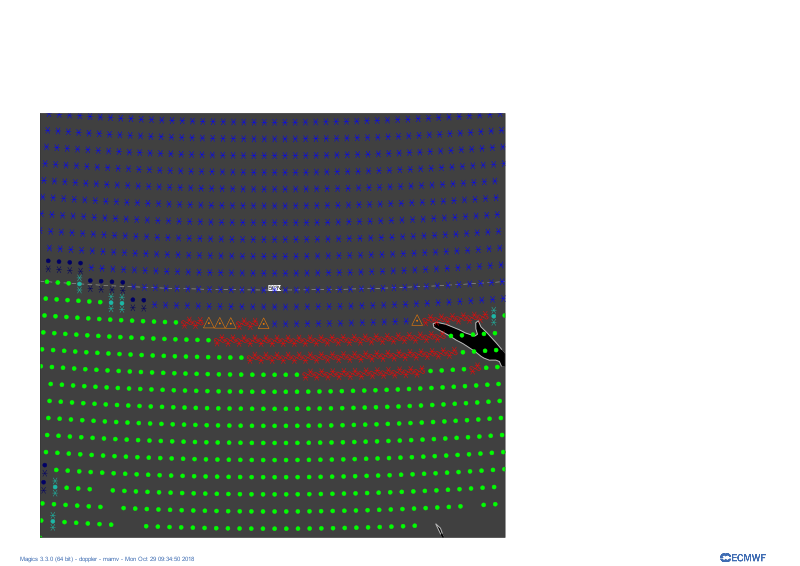

In [12]:
marker_shading = magics.mcont(
        contour                         = "off",
        legend                          = "off",
        contour_level_list              = [1.00,3.00,5.00,6.00,7.00,8.00,9.00],
        contour_level_selection_type    = "level_list",
        contour_shade                   = "on",
        contour_shade_colour_table      = ["green","red","blue","navy","turquoise","orange"],
        contour_shade_height_table      = [1.0],
        contour_shade_marker_table_type = "name",
        contour_shade_marker_name_table = ["ww_60","ww_67","ww_70","ww_68","ww_69","ww_79"],
        contour_shade_technique         = "marker") 

zoomed_projection = magics.mmap(
    subpage_clipping  = 'on',
    subpage_lower_left_latitude    = 47.,
    subpage_lower_left_longitude   = 25.0,
    subpage_map_projection         = 'polar_stereographic',
    subpage_upper_right_latitude   = 52.,
    subpage_upper_right_longitude  = 33.5,
    subpage_map_vertical_longitude = 29.0,
    subpage_map_area_definition  = 'corners'

)

magics.plot(zoomed_projection, black_coast, ptype, marker_shading)

### Cell shading

Cell shading is another contour_shade_technique. If we don't want to do full grid shading, but to group them in cells, we can use cell_shading technique.

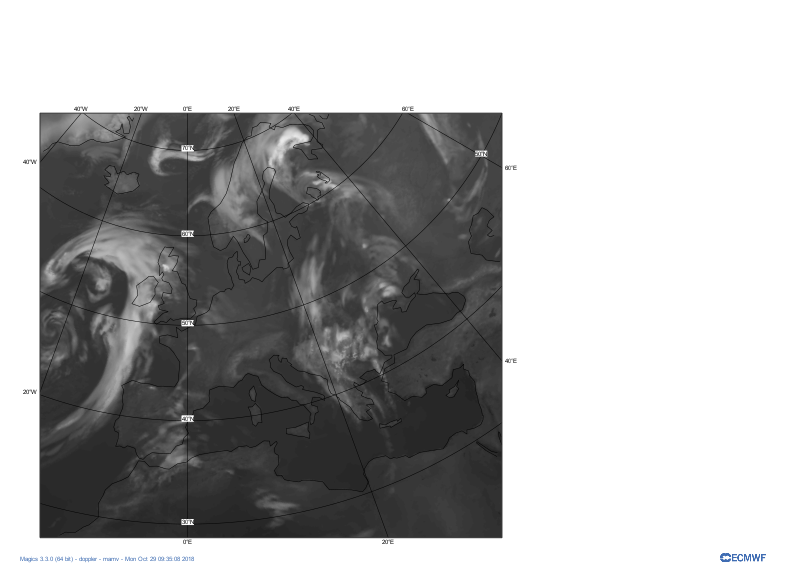

In [13]:
ir_clouds = magics.mcont(
    contour_shade_colour_direction   = "anti_clockwise",
    contour_shade_min_level_colour   = "white",
    contour_shade_max_level_colour   = "black",
    contour_shade_colour_method      = "calculate",
    legend                           = "off",
    contour                          = "off",
    contour_level_selection_type     = "level_list",
    contour_level_list               = [170.,199.,201.,203.,205.,207,208,209,210,
                                        211,212,213,214,215,216,217,218,219,220,
                                        221,222,223,224,225,226,227,228,229,230,
                                        231,232,233,234,235,236,237,238,239,240,
                                        241,242,243,244,245,246,247,249,251,253,
                                        255,257,259,261,263,265,267,269,271,273,
                                        275,277,279,281,283,285,287,289,291,293,
                                        295,297,299,301,303,305,307,310,315,320,350],
    contour_shade                    = "on",
    contour_shade_technique          = "cell_shading",
    contour_shade_cell_resolution    = 80
    )

magics.plot(projection, sat_ir, ir_clouds, legend, coast)